In [6]:
from __future__ import print_function
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
import pandas as pd
import string
from time import time
import nltk
from nltk.corpus import stopwords 
stops = set(stopwords.words("english"))
import re
from IPython.display import display 
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
RAN_STATE = 42 

In [7]:
for dirname, _, filenames in os.walk('Electronics_5.json'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [8]:
data=pd.read_json('Electronics_5.json',lines=True,orient='columns')
data.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,AO94DHGC771SJ,0528881469,amazdnu,"[0, 0]",We got this GPS for my husband who is an (OTR)...,5,Gotta have GPS!,1370131200,"06 2, 2013"
1,AMO214LNFCEI4,0528881469,Amazon Customer,"[12, 15]","I'm a professional OTR truck driver, and I bou...",1,Very Disappointed,1290643200,"11 25, 2010"
2,A3N7T0DY83Y4IG,0528881469,C. A. Freeman,"[43, 45]","Well, what can I say. I've had this unit in m...",3,1st impression,1283990400,"09 9, 2010"
3,A1H8PY3QHMQQA0,0528881469,"Dave M. Shaw ""mack dave""","[9, 10]","Not going to write a long review, even thought...",2,"Great grafics, POOR GPS",1290556800,"11 24, 2010"
4,A24EV6RXELQZ63,0528881469,Wayne Smith,"[0, 0]",I've had mine for a year and here's what we go...,1,"Major issues, only excuses for support",1317254400,"09 29, 2011"


In [9]:
def preprocess(x):
    x = x.replace(",000,000", " m").replace(",000", " k").replace("′", "'").replace("’", "'")\
                           .replace("won't", " will not").replace("cannot", " can not").replace("can't", " can not")\
                           .replace("n't", " not").replace("what's", " what is").replace("it's", " it is")\
                           .replace("'ve", " have").replace("'m", " am").replace("'re", " are")\
                           .replace("he's", " he is").replace("she's", " she is").replace("'s", " own")\
                           .replace("%", " percent ").replace("₹", " rupee ").replace("$", " dollar ")\
                           .replace("€", " euro ").replace("'ll", " will").replace("how's"," how has").replace("y'all"," you all")\
                           .replace("o'clock"," of the clock").replace("ne'er"," never").replace("let's"," let us")\
                           .replace("finna"," fixing to").replace("gonna"," going to").replace("gimme"," give me").replace("gotta"," got to").replace("'d"," would")\
                           .replace("daresn't"," dare not").replace("dasn't"," dare not").replace("e'er"," ever").replace("everyone's"," everyone is")\
                           .replace("'cause'"," because").replace("i'm"," i am")
    
    x = re.sub(r"([0-9]+)000000", r"\1m", x)
    x = re.sub(r"([0-9]+)000", r"\1k", x)
    x=re.sub(r'((www\.[^\s]+)|(https?://[^\s]+))',' ',x)
    x=re.sub(r"\\s*\\b(?=\\w*(\\w)\\1{2,})\\w*\\b",' ',x)
    x=re.sub(r'<.*?>',' ',x)
    x=re.sub('[^a-zA-Z]',' ',x)
    x=''.join([i for i in x if not i.isdigit()])
    return x

In [14]:
from nltk.corpus import stopwords
from textblob import TextBlob
from textblob import Word

# Lower casing and removing punctuations
data['reviewText'] = data['reviewText'].apply(lambda x: " ".join(x.lower() for x in x.split()))
data['reviewText'] = data['reviewText'].str.replace('[^\w\s]','')

# Removing stopwords
data['reviewText'] = data['reviewText'].apply(lambda x: preprocess(x))

# Lemmatization
data['reviewText'] = data['reviewText'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
data.reviewText.head(5)

0    we got this gps for my husband who is an otr o...
1    i am a professional otr truck driver and i bou...
2    well what can i say i have had this unit in my...
3    not going to write a long review even thought ...
4    i have had mine for a year and here own what w...
Name: reviewText, dtype: object

In [15]:
data.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,AO94DHGC771SJ,0528881469,amazdnu,"[0, 0]",we got this gps for my husband who is an otr o...,5,Gotta have GPS!,1370131200,"06 2, 2013"
1,AMO214LNFCEI4,0528881469,Amazon Customer,"[12, 15]",i am a professional otr truck driver and i bou...,1,Very Disappointed,1290643200,"11 25, 2010"
2,A3N7T0DY83Y4IG,0528881469,C. A. Freeman,"[43, 45]",well what can i say i have had this unit in my...,3,1st impression,1283990400,"09 9, 2010"
3,A1H8PY3QHMQQA0,0528881469,"Dave M. Shaw ""mack dave""","[9, 10]",not going to write a long review even thought ...,2,"Great grafics, POOR GPS",1290556800,"11 24, 2010"
4,A24EV6RXELQZ63,0528881469,Wayne Smith,"[0, 0]",i have had mine for a year and here own what w...,1,"Major issues, only excuses for support",1317254400,"09 29, 2011"


In [16]:
#select the columns
df = data.iloc[:, [5,4,3]]

#split numerator and denominator
df['helpful_numerator'] = df['helpful'].apply(lambda x: x[0])
df['helpful_denominator'] = df['helpful'].apply(lambda x: x[1])

# delete un-needed helpful column
del df['helpful']

#Check if we have any null values
print (df.isnull().sum())

overall                0
reviewText             0
helpful_numerator      0
helpful_denominator    0
dtype: int64


In [17]:
df.describe()

,overall,helpful_numerator,helpful_denominator
count,1.689188e+06,1.689188e+06,1.689188e+06
mean,4.222779e+00,3.160563e+00,3.780423e+00
std,1.185632e+00,3.896195e+01,4.067347e+01
min,1.000000e+00,0.000000e+00,0.000000e+00
25%,4.000000e+00,0.000000e+00,0.000000e+00
50%,5.000000e+00,0.000000e+00,0.000000e+00
75%,5.000000e+00,1.000000e+00,2.000000e+00
max,5.000000e+00,3.073500e+04,3.145300e+04


In [18]:
df1 = df[(df.helpful_denominator > 20)].copy()
df1.shape

(50499, 4)

In [19]:
threshold = 0.5
df1.loc[:, 'Helpful'] = np.where(df1.loc[:, 'helpful_numerator'] \
                                 / df1.loc[:, 'helpful_denominator'] > threshold, 1, 0)
df1.head(3)

,overall,reviewText,helpful_numerator,helpful_denominator,Helpful
2,3,well what can i say i have had this unit in my...,43,45,1
211,3,i purchased this mount for my inch lcd tv inst...,70,92,1
221,5,do not listen to other reviewer screw that thi...,18,23,1


In [20]:
print ('Count:')
display(df1.groupby('Helpful').count())

Count:


,overall,reviewText,helpful_numerator,helpful_denominator
Helpful,,,,
0,4897,4897,4897,4897
1,45602,45602,45602,45602


In [21]:
df1

,overall,reviewText,helpful_numerator,helpful_denominator,Helpful
2,3,well what can i say i have had this unit in my...,43,45,1
211,3,i purchased this mount for my inch lcd tv inst...,70,92,1
221,5,do not listen to other reviewer screw that thi...,18,23,1
263,5,the nook tablet is a solid hybrid tablet ebook...,33,39,1
273,1,update sep put on cm android last week i have ...,52,57,1
...,...,...,...,...,...
1689042,5,to put it in perspective for people who say it...,20,21,1
1689045,3,suck that i would have to buy a whole new moth...,5,63,0
1689071,5,yes usd seems to be a very big amount for rout...,11,21,1
1689082,5,wow after year of fighting weak wifi really ye...,28,32,1


In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(min_df = 0.01)

features = vectorizer.fit_transform(df1['reviewText'])
features

<50499x2277 sparse matrix of type '<class 'numpy.float64'>'
	with 7502337 stored elements in Compressed Sparse Row format>

In [27]:
# split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features,df1['Helpful'], test_size=0.2, random_state=RAN_STATE)

In [28]:
from sklearn.metrics import roc_auc_score, roc_curve

def train_classifier(clf, X_train, y_train):

    start = time()
    clf.fit(X_train, y_train)
    end = time()
    
    print ("Trained model in {:.4f} seconds".format(end - start))

    
def predict_labels(clf, features, target):
    
    start = time()
    probas = clf.predict_proba(features)
    end = time()
    
    print ("Made predictions in {:.4f} seconds.".format(end - start))
    return roc_auc_score(target.values, probas[:,1].T)


def train_predict(clf, X_train, y_train, X_test, y_test):
    
    print ("Training a {} using a training set size of {}. . .".format(clf.__class__.__name__, X_train.shape[0]))
    
    train_classifier(clf, X_train, y_train)
    
    print ("ROC_AUC score for training set: {:.4f}.".format(predict_labels(clf, X_train, y_train)))
    print ("ROC_AUC score for test set: {:.4f}.\n".format(predict_labels(clf, X_test, y_test)))
    
def clf_test_roc_score(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    probas = probas =clf.predict_proba(X_test)
    return roc_auc_score(y_test, probas[:,1].T)

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

clf_list = [GaussianNB(),  
            LogisticRegression(random_state = RAN_STATE),
            DecisionTreeClassifier(random_state = RAN_STATE)]
x_tr = X_train.toarray()
x_te = X_test.toarray()


train_feature_list = [x_tr[0:10000],x_tr[0:20000],x_tr]
train_target_list = [y_train[0:10000], y_train[0:20000], y_train]


for clf in clf_list:
    for a, b in zip(train_feature_list, train_target_list):
        train_predict(clf, a, b, x_te, y_test)

Training a GaussianNB using a training set size of 10000. . .
Trained model in 0.3501 seconds
Made predictions in 0.5010 seconds.
ROC_AUC score for training set: 0.8958.
Made predictions in 0.5157 seconds.
ROC_AUC score for test set: 0.7027.

Training a GaussianNB using a training set size of 20000. . .
Trained model in 0.6666 seconds
Made predictions in 1.0730 seconds.
ROC_AUC score for training set: 0.8466.
Made predictions in 0.5096 seconds.
ROC_AUC score for test set: 0.7434.

Training a GaussianNB using a training set size of 40399. . .
Trained model in 1.3820 seconds
Made predictions in 2.1547 seconds.
ROC_AUC score for training set: 0.8165.
Made predictions in 0.5159 seconds.
ROC_AUC score for test set: 0.7703.

Training a LogisticRegression using a training set size of 10000. . .
Trained model in 0.7712 seconds
Made predictions in 0.0469 seconds.
ROC_AUC score for training set: 0.9225.
Made predictions in 0.0312 seconds.
ROC_AUC score for test set: 0.8680.

Training a LogisticR

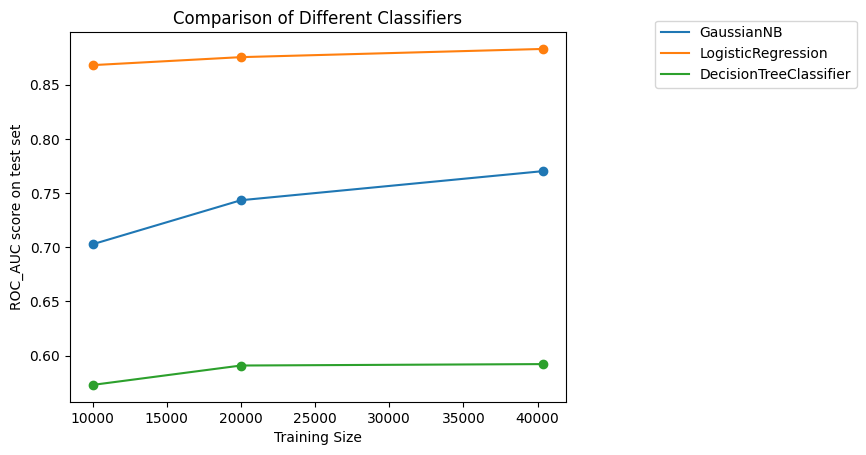

<Figure size 1400x800 with 0 Axes>

In [32]:
FIG_SIZE = (14,8)
for clf in clf_list:
    x_graph = []
    y_graph = []
    for a, b in zip(train_feature_list, train_target_list):
        y_graph.append(clf_test_roc_score(clf, a, b, x_te, y_test))
        x_graph.append(len(a))
    plt.scatter(x_graph,y_graph)
    plt.plot(x_graph,y_graph, label = clf.__class__.__name__)

plt.title('Comparison of Different Classifiers')
plt.xlabel('Training Size')
plt.ylabel('ROC_AUC score on test set')
plt.legend(bbox_to_anchor=(1.6, 1.05))
plt.figure(figsize=FIG_SIZE)             
plt.show() 

In [33]:
import scipy as scipy

overall = np.array(list(df1.overall))
overall = overall.reshape(features.shape[0], 1)

features = scipy.sparse.hstack((features,scipy.sparse.csr_matrix(overall)))

features = scipy.sparse.csr_matrix(features)
features

<50499x2278 sparse matrix of type '<class 'numpy.float64'>'
	with 7552836 stored elements in Compressed Sparse Row format>

In [34]:
X_train2, X_test2, y_train, y_test = train_test_split(features, df1['Helpful'], test_size=0.2, random_state=RAN_STATE)

In [35]:
from sklearn.model_selection import GridSearchCV,cross_validate,StratifiedKFold

gs2 = GridSearchCV(
    estimator=LogisticRegression(),
    param_grid={'C': [10**i for i in range(-5,5)], 'class_weight': [None, 'balanced']},
    cv=StratifiedKFold(n_splits=5),
    scoring='roc_auc'
)

print ('Fitting grid search...')
gs2.fit(X_train2, y_train)
print ("Grid search fitted.")

Fitting grid search...
Grid search fitted.


In [36]:
gs2.best_params_

{'C': 1, 'class_weight': None}

In [37]:
clf2 = gs2.best_estimator_
probas =clf2.predict_proba(X_test2)


print ('ROC_AUC Score:',roc_auc_score(y_test, probas[:,1].T))

ROC_AUC Score: 0.9062613028730747


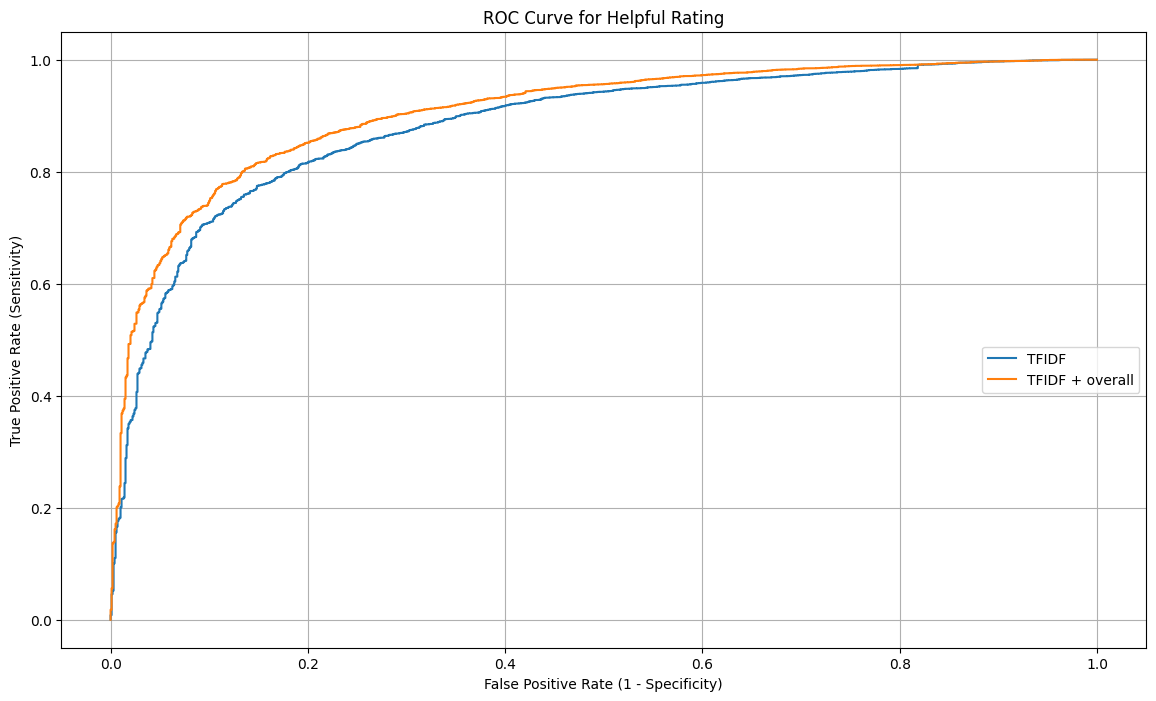

<Figure size 1400x800 with 0 Axes>

In [38]:
clf = LogisticRegression()
clf.fit(X_train,y_train)
probas = clf.predict_proba(X_test)
clf2 = gs2.best_estimator_
probas2 =clf2.predict_proba(X_test2)
plt.figure(figsize = FIG_SIZE)

plt.plot(roc_curve(y_test, probas[:,1])[0], roc_curve(y_test, probas[:,1])[1], label = 'TFIDF')
plt.plot(roc_curve(y_test, probas2[:,1])[0], roc_curve(y_test, probas2[:,1])[1], label = 'TFIDF + overall')
plt.title('ROC Curve for Helpful Rating')
plt.grid()
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

plt.legend(bbox_to_anchor=(1.0, .5))
plt.figure(figsize=FIG_SIZE)
plt.show()

In [39]:
data.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,AO94DHGC771SJ,0528881469,amazdnu,"[0, 0]",we got this gps for my husband who is an otr o...,5,Gotta have GPS!,1370131200,"06 2, 2013"
1,AMO214LNFCEI4,0528881469,Amazon Customer,"[12, 15]",i am a professional otr truck driver and i bou...,1,Very Disappointed,1290643200,"11 25, 2010"
2,A3N7T0DY83Y4IG,0528881469,C. A. Freeman,"[43, 45]",well what can i say i have had this unit in my...,3,1st impression,1283990400,"09 9, 2010"
3,A1H8PY3QHMQQA0,0528881469,"Dave M. Shaw ""mack dave""","[9, 10]",not going to write a long review even thought ...,2,"Great grafics, POOR GPS",1290556800,"11 24, 2010"
4,A24EV6RXELQZ63,0528881469,Wayne Smith,"[0, 0]",i have had mine for a year and here own what w...,1,"Major issues, only excuses for support",1317254400,"09 29, 2011"


In [40]:
df2 = data.iloc[:, [5,4]]
df2.head(10)

,overall,reviewText
0,5,we got this gps for my husband who is an otr o...
1,1,i am a professional otr truck driver and i bou...
2,3,well what can i say i have had this unit in my...
3,2,not going to write a long review even thought ...
4,1,i have had mine for a year and here own what w...
5,5,i am using this with a nook hd it work a descr...
6,2,the cable is very wobbly and sometimes disconn...
7,5,this adaptor is real easy to setup and use rig...
8,4,this adapter easily connects my nook hd to my ...
9,5,this product really work great but i found the...


In [41]:
def score_classify(x):
    if x>3:
        return 'Positive'
    elif x<3:
        return 'Negative'
    else:
        return 'Neutral'
df2['Overall_Sentiment']=df2.apply(lambda x: score_classify(x['overall']),axis=1)
df2

,overall,reviewText,Overall_Sentiment
0,5,we got this gps for my husband who is an otr o...,Positive
1,1,i am a professional otr truck driver and i bou...,Negative
2,3,well what can i say i have had this unit in my...,Neutral
3,2,not going to write a long review even thought ...,Negative
4,1,i have had mine for a year and here own what w...,Negative
...,...,...,...
1689183,5,burned these in before listening to them for a...,Positive
1689184,5,some people like dj style headphone or earbud ...,Positive
1689185,5,i m a big fan of the brainwavz s actually all ...,Positive
1689186,5,i have used thebrainwavz s in ear headphone an...,Positive


In [42]:
df2.Overall_Sentiment.value_counts()

Overall_Sentiment
Positive    1356067
Negative     190864
Neutral      142257
Name: count, dtype: int64

In [45]:
from textblob import TextBlob

sentiment_score_list = []
sentiment_label_list = []

for i in df2['reviewText'].values.tolist():
    sentiment_text=TextBlob(i)
    sentiment_score = sentiment_text.sentiment.polarity
    #print(sentiment_score)

    if sentiment_score > 0:
        sentiment_score_list.append(sentiment_score)
        sentiment_label_list.append('Positive')
    elif sentiment_score < 0:
        sentiment_score_list.append(sentiment_score)
        sentiment_label_list.append('Negative')
    else:
        sentiment_score_list.append(sentiment_score)
        sentiment_label_list.append('Neutral')
    
df2['Review_Sentiment'] = sentiment_label_list
df2['sentiment score'] = sentiment_score_list

display(df2.head(10))

,overall,reviewText,Overall_Sentiment,Review_Sentiment,sentiment score
0,5,we got this gps for my husband who is an otr o...,Positive,Positive,0.275000
1,1,i am a professional otr truck driver and i bou...,Negative,Positive,0.067253
2,3,well what can i say i have had this unit in my...,Neutral,Positive,0.127144
3,2,not going to write a long review even thought ...,Negative,Positive,0.047284
4,1,i have had mine for a year and here own what w...,Negative,Positive,0.035957
5,5,i am using this with a nook hd it work a descr...,Positive,Positive,1.000000
6,2,the cable is very wobbly and sometimes disconn...,Negative,Negative,-0.100000
7,5,this adaptor is real easy to setup and use rig...,Positive,Positive,0.274439
8,4,this adapter easily connects my nook hd to my ...,Positive,Positive,0.297718
9,5,this product really work great but i found the...,Positive,Positive,0.169035


In [46]:
before=df2.shape[0]
df2 = df2[df2.Overall_Sentiment != 'Neutral']
df2 = df2[df2.Review_Sentiment != 'Neutral']
df2.head(10)
after=df2.shape[0]

In [47]:
print("The number of neutral labels have been removed : {}".format(before-after))

The number of neutral labels have been removed : 174642


In [48]:
comparison_column = np.where(df2["Overall_Sentiment"] == df2["Review_Sentiment"], True, False)
df2["result"] = comparison_column
df2.head()

,overall,reviewText,Overall_Sentiment,Review_Sentiment,sentiment score,result
0,5,we got this gps for my husband who is an otr o...,Positive,Positive,0.275000,True
1,1,i am a professional otr truck driver and i bou...,Negative,Positive,0.067253,False
3,2,not going to write a long review even thought ...,Negative,Positive,0.047284,False
4,1,i have had mine for a year and here own what w...,Negative,Positive,0.035957,False
5,5,i am using this with a nook hd it work a descr...,Positive,Positive,1.000000,True


In [49]:
df2 = df2[df2.result != True]
print(df2.shape)
df2.head()

(197878, 6)


,overall,reviewText,Overall_Sentiment,Review_Sentiment,sentiment score,result
1,1,i am a professional otr truck driver and i bou...,Negative,Positive,0.067253,False
3,2,not going to write a long review even thought ...,Negative,Positive,0.047284,False
4,1,i have had mine for a year and here own what w...,Negative,Positive,0.035957,False
22,4,this wall mount doe everything it is supposed ...,Positive,Negative,-0.092143,False
36,5,did not think it would work a well a it ha bec...,Positive,Negative,-0.063889,False
